    ✍ Теперь, когда вы знаете основные классы задач машинного обучения, настало время перейти к предварительной обработке (препроцессингу, preprocessing) данных. Препроцессинг в машинном обучении — это важный шаг, который помогает повысить качество данных с целью извлечения из них значимых идей.

    Как правило, реальные данные являются неполными, непоследовательными, неточными (содержат ошибки или выбросы). Препроцессинг данных помогает очищать, форматировать и упорядочивать необработанные данные, тем самым делая их готовыми к работе с моделями машинного обучения.

**В этом модуле мы повторим:**

* какие способы представления данных существуют;
* почему к разным представлениям данных нужны разные подходы;
* как происходит кодирование признаков;
* какие способы заполнения пропусков в данных существуют.

Мы разберём:| Вы научитесь:
---------|----------
что такое разбиение по бинам и как его осуществить;| ыбирать подходящий метод кодирования признаков в зависимости  от типа модели машинного обучения;
что такое трансформация распределения и какие её разновидности существуют;| подготавливать данные к обучению;
что такое масштабирование признаков;| производить анализ влияния отбора и селекции признаков на качество модели с помощью Comet ML.
как работать с датами и расстояниями;| 
какие алгоритмы машинного обучения более чувствительны к предобработке данных.| 

Обратимся к нашим данным. Нас просят предсказать цену автомобиля. Для обучения модели выделим целевой столбец:

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [39]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [40]:
y = data['price']
X = data.drop(columns='price')

In [42]:
lr = LinearRegression()
lr.fit(X,y)

ValueError: could not convert string to float: 'clean'

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

Чтобы этой ошибки не возникало, необходимо закодировать данные такими методами кодирования, как:

* порядковое кодирование;
* двоичное кодирование;
* однократное кодирование.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-3_2.png)

В таблице ниже представлено сравнение данных способов кодировки:

Значения признака «Образование»| Порядковое кодирование| Двоичное кодирование| Однократное кодирование
------|-------|-------|--------
Нет| 1| 000| 000001
Начальное| 2| 001| 000010
Среднее| 3| 010| 000100
BSc| 4| 011| 001000
MSc| 5| 100| 010000
PhD| 6| 101| 100000

Для реализации данных методов мы использовали библиотеку `category_encoders`. Однако вы уже знаете и такой мощный инструмент, как *scikit-learn*. Данная библиотека содержит набор реализованных алгоритмов машинного обучения, метрик для оценки их качества, а также  класс `preprocessing` для предобработки данных, в частности — для кодирования категориальных признаков.

Представленная ниже таблица показывает соответствие типа кодирования классу в `sklearn.processing`.

Тип кодировки| Класс библиотеки sklearn
------|--------
Порядковое кодирование| LabelEncoder
Двоичное кодирование| LabelBinarizer
Однократное кодирование| OneHotEncoder

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-3_3.png)

>Преимущество использования одной библиотеки состоит в типичности методов. Например, вы знаете, что для обучения модели в sklearn используется метод `fit()`. При кодировании признаков здесь также применяют `fit()` для подгонки кодировщика под выборку и `transform()` — для преобразования данных в числа.

**Алгоритм кодирования в sklearn следующий:**

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-3_4.png)

Из предыдущих модулей мы знаем, что при решении задач машинного обучения данные разбираются на обучающую (*train*) и валидационную (*validation*) выборки (последняя также может быть тестовой (*test*) выборкой). По аналогии подгонка кодировщика происходит на обучающей выборке, а трансформация — на обучающей и на тестовой.

Почему так? Потому что наша обученная модель не должна видеть данные, которые подаются в неё на тесте. Только так мы можем судить о том, что модель обучена качественно. То же самое и с кодировкой.

Давайте посмотрим на кодирование признака Образование способом «один-против-всех» (*one vs all*):

In [43]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
 
lb.fit(education)
 
print('категории:', lb.classes_)
 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

У класса `LabelBinarizer`, как и у двух остальных, есть атрибут `classes_`, который выводит список уникальных значений признака.

Вернёмся к нашей выборке. В ней присутствуют следующие категориальные признаки: `condition`, `cylinders`, `title_status`, `transmission`, `drive`, `size`.

При этом признаки `condition` и `cylinders` — числовые, а `title_status`, `transmission`, `drive`, `size` — текстовые.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-3_6.png)

Важно производить кодирование номинальных признаков, даже если они уже представлены в числовом формате, так как, в отличие от порядковых признаков, **категории номинальных являются независимыми**. В случае порядкового кодирования таких признаков мы вносим искусственные закономерности в данные (например, чем больше числовой код цилиндров, тем лучше, хотя это необязательно так).

Посмотрим на число уникальных значений номинальных признаков `title_status`, `transmission`, `drive`, `size` и `cylinders`:

In [44]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — `fit_transform()`. В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода `get_feature_names_out()` получим список новых названий колонок:

In [45]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


Отлично, категориальные признаки закодированы. Теперь нам необходимо соединить преобразованные данные с исходными.

Напомним, что у библиотеки pandas есть дефолтный метод `get_dummies()` для получения однократного кодирования признаков. Однако `OneHotEncoder` способен принимать на вход как таблицы, так и numpy-массивы.

#### <center>РАБОТА С ПРОПУСКАМИ

Как вы знаете, помимо типов данных, метод `info()` показывает и число ненулевых значений признака. Если данное число отлично от длины выборки, то в данных присутствуют пропуски.

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [47]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


Для того чтобы выделить конкретные строки датасета, в столбцах которых присутствуют NaN (пропуски), используются уже знакомые вам методы `isnull()` и `isna()`.

>Метод `isnull()` является **алиасом** метода `isna()`: когда вы используете `isnull()`, он вызывает `isna()`. Таким образом, это два одинаковых метода.

Посмотрим, что будет, если просто убрать все строки с пропусками в столбце *weather*:

In [49]:
data[~data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


Число строк сократилось до 6837.

>Символ `~` (тильда) означает, что мы выбираем все строки датасета `data`, где не выполняется условие `data['weather'].isna()`, то есть где нет пропусков в столбце `'weather'`.

Наибольшая сложность в очистке данных от пропусков заключается в выборе метода их обработки. Давайте вспомним, какими они бывают:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-4_2.png)

    → Первым делом воспользуемся методом удаления строк с пропусками. Плюс данного метода состоит в том, что модель, обученная с удалением всех пропущенных значений, является надёжной, то есть имеет сравнительно хорошее качество на тесте. Среди минусов — потеря большого количества информации, а также плохое качество работы, если процент отсутствующих значений слишком велик по сравнению с полным набором данных.

В качестве регрессора воспользуемся линейной моделью, а качество оценим с помощью коэффициента детерминации. Также нам потребуется разделить модель на обучающую и тестовую выборки.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
y = data['price']
x = data.drop(columns='price')

Удалим данные с пропусками:

In [52]:
x = x.dropna()

Мы удалили некоторые строки из таблицы x. Соответственно, надо сделать то же самое в целевой переменной `y`.

Выберем все оставшиеся индексы таблицы `x` с помощью метода `index()`, а затем используем `.iloc[]`, чтобы получить подгруппу целевых значений, соответствующую полученным индексам.

In [53]:
y = y.iloc[x.index]

Разделим выборку на тренировочную и тестовую в соотношении 80/20:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

>Следующий блок кода будет повторяться для каждого из методов обработки пропусков.

_______

Проведём кодирование OneHot-методом категориальных переменных.

In [55]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [56]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

In [57]:
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
    one_hot_encoder = OneHotEncoder()
    X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
    X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

    columns = one_hot_encoder.get_feature_names_out(columns_to_change)
    
    X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
    X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

    X_train = X_train.reset_index().drop(['index'], axis = 1)
    X_test = X_test.reset_index().drop(['index'], axis = 1)
    y_train = y_train.reset_index().drop(['index'], axis = 1)

    X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
    X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
    
    X_train_new = X_train_new.drop(columns=columns_to_change)
    X_test_new = X_test_new.drop(columns=columns_to_change)

    return X_train_new, X_test_new

In [72]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

Обучаем энкодер и сразу применяем преобразование к выборке. Результат переводим в массив:

In [73]:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:

In [74]:
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

Для удобства сохраним полученные названия новых колонок в отдельную переменную:

In [75]:
columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

Теперь у нас есть массив закодированных признаков и наша изначальная таблица. Чтобы соединить эти данные, переведём массив в формат *DataFrame*.

In [76]:
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

>Таблица `X_train` содержит рандомные индексы, так как мы разделили выборку на *train* и *test*. Если просто соединить `X_train` и `X_train_onehot_df`, то получится таблица, полная пропусков по причине несовпадения индексов.

Переустановим индексацию в таблицах, применив подряд сразу два метода: `reset_index()` — для изменения индексов с рандомных на последовательные от 0 до n и `drop(['index'], axis = 1)` — для удаления образовавшегося столбца `'index'`.

In [77]:
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

Объединяем таблицы и удаляем старые категориальные признаки:

In [78]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
 
X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

Настало время обучить модель. Для этого создаём объект класса `LinearRegression`.

In [64]:
lr_model = LinearRegression()

Обучаем модель по МНК (метод наименьших квадратов):

In [65]:
lr_model.fit(X_train_new, y_train)

LinearRegression()

Делаем предсказание для тренировочной выборки:

In [66]:
y_train_predict = lr_model.predict(X_train_new)

Делаем предсказание для тестовой выборки:

In [67]:
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

# Train R^2: 0.647
# Test R^2: 0.693

Train R^2: 0.647
Test R^2: 0.693


    → Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

Заполним числовой столбец средним значением, округлив его до целого числа:

In [81]:
import numpy as np

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
 
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов `value_counts()` и `head()`:

In [83]:
X_train['drive'].value_counts(True).head(1)

# 4wd   0.755447
# Name: drive, dtype: float64

drive
4wd    0.738406
Name: proportion, dtype: float64

In [84]:
X_train['size'].value_counts(True).head(1)

# full-size   0.877418
# Name: size, dtype: float64

size
full-size    0.841164
Name: proportion, dtype: float64

In [85]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

In [86]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

После обучения модели получился следующий результат:

In [87]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.649
Test R^2: 0.465


>Напомним: модели с коэффициентом детерминации выше 0.8 можно признать достаточно хорошими. Равенство коэффициента детерминации 1 означает, что объясняемая переменная в точности описывается рассматриваемой моделью.

Приведённые методы обработки отсутствующих значений не учитывают корреляционную связь признака, содержащего пропуски, с остальными. Признаки, не имеющие NaN, можно использовать для прогнозирования пропущенных значений. Строится модель регрессии или классификации в зависимости от характера (категорийного или непрерывного) признака, имеющего пропущенное значение.

In [88]:
data = x.copy()
 
test_data = data[data['weather'].isnull()]
data.dropna(inplace=True)
 
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

In [89]:
categorial_cols = ['cylinders', 'title_status', 'transmission']

In [90]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [91]:
model = LinearRegression()
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

array([ 40.91435555,  40.7637233 ,  39.74866152,  41.2755305 ,
        40.31791932,  41.10796547,  41.15337846,  39.94866488,
        41.10796547,  40.7217165 ,  40.18904454,  91.62094167,
        41.12549856,  41.33052316,  39.66827354,  40.91435555,
        40.77287826,  40.84208674,  41.10796547,  41.02118034,
        40.31791932,  41.30309209,  40.77645269,  40.75842615,
        40.61605044,  40.79031628,  40.7701239 ,  39.78723017,
        41.27231621,  39.77492057,  40.7637233 ,  40.7701239 ,
        41.10796547,  39.68313064,  40.12277414,  39.7873657 ,
        41.07798631,  41.06812063,  40.7637233 ,  40.90194049,
        41.10796547,  70.85737739,  30.44339508,  40.76125291,
        39.77492057,  41.12549856,  39.74864816,  40.72219488,
        40.97162064,  40.7448585 ,  39.71065847,  39.78779447,
        39.77492057,  40.15945849,  41.12549856,  40.7902779 ,
        39.65555168,  41.10796547,  40.76125291,  40.15619215,
        40.79031628,  41.10796547,  40.7902779 ,  40.72

#### <center>РАБОТА С ВЫБРОСАМИ

Помимо пропусков, на пути анализа данных всплывает ещё один подводный камень — **выбросы (аномалии)**.

Вспомним, какие методы детектирования выбросов существуют.

    Выбросы могут искажать статистические показатели и распределения данных. Удаление выбросов из обучающих данных перед моделированием может привести к росту качества прогнозов.

    К счастью, существуют автоматические, основанные на моделях методы выявления выбросов, которые уже имплементированы в sklearn.

Посмотрим, как обработка выбросов влияет на качество модели регрессии. В качестве метрики воспользуемся *MAE*.

Для начала сформируем *baseline*-модель. Проведём следующую предобработку: для простоты уберём категориальные столбцы из данных и затем удалим строки с пропусками.

In [93]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [94]:
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long','weather']]
data.dropna(inplace = True)

In [95]:
y = data['price']
x = data.drop(columns='price')
x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [96]:
from sklearn.metrics import mean_absolute_error

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


Настало время обработки выбросов.

1. Первый алгоритм, который мы применим, — **Isolation Forest**, или **iForest**. Это алгоритм обнаружения аномалий на основе дерева.

    Данный метод стремится изолировать аномалии, которые немногочисленны и различаются по пространству признаков.

Библиотека *scikit-learn* предоставляет реализацию *Isolation Forest* в классе **IsolationForest**.

Одним из основных гиперпараметров модели является `contamination` («загрязнение»), который используется для оценки количества выбросов в наборе данных. Его значение находится в диапазоне от 0.0 до 0.5 и по умолчанию равно 0.1.

In [98]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
iso.fit(X_train.values)
y_predicted = iso.predict(X_train.values)

In [99]:
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(4306, 6) (4306,)
MAE: 4451.480


2. Следующий метод — **Local Outlier Factor**, или **LOF**. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.

    Каждому примеру присваивается оценка того, насколько он изолирован от его локальных соседей. Примеры, которые наиболее отдалены от соседей, скорее всего, будут являться выбросами.

Библиотека scikit-learn обеспечивает реализацию этого подхода в классе **LocalOutlierFactor**.

In [100]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3966, 6) (3966,)
MAE: 4445.937


3. Напоследок рассмотрим **Minimum Covariance Determinant**, или **MCD**.

Если входные переменные имеют гауссово распределение, то для обнаружения выбросов можно использовать простые статистические методы.

Например, если набор данных имеет две входные переменные и обе они являются гауссовыми, то пространство признаков образует многомерную гауссовскую зависимость, и знание этого распределения можно использовать для определения значений, далёких от распределения.

>Этот подход можно обобщить, определив гиперсферу (эллипсоид), которая покрывает нормальные данные, а данные, выходящие за пределы этой формы, считаются выбросами. Эффективная реализация этого метода для многомерных данных известна как **детерминант минимальной ковариации (MCD)**.

Библиотека scikit-learn предоставляет доступ к этому методу через класс **EllipticEnvelope**.

In [101]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3926, 6) (3926,)
MAE: 4456.201


>Данные алгоритмы носят стохастический характер, поэтому результаты метрики могут отличаться от прогона к прогону.

    Мы видим, что оптимальный результат достигается с помощью древовидного алгоритма Isolation Forest, тогда как пространственные методы LOF и MCD принимают за выбросы больше данных, что приводит к ухудшению качества. Тем не менее все три метода превосходят baseline.

Ниже приведено визуальное сравнение трёх методов на «игрушечных» данных:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-4_6.png)

>✍ Часто встречаются наборы данных, в которых разные столбцы имеют разные единицы измерения: например, один столбец может быть в килограммах, а другой — в сантиметрах. Кроме того, у нас могут быть такие столбцы, как price, который может варьироваться от 1 до 300000 и даже больше, в то время как столбец weather изменяется от 29 до 71 (максимум). Таким образом, price примерно в 4000 раз больше, чем weather.

>Но как мы можем быть уверены, что модель одинаково обрабатывает обе эти переменные? Когда мы подаём эти признаки в модель как есть, есть все шансы, что price больше повлияет на результат предсказания, например, года выпуска автомобиля, из-за большего значения параметра цены. Но это не обязательно означает, что данный параметр более важен как предиктор. Итак, чтобы придать значение как price, так и weather, нужно масштабирование признаков.

Давайте посмотрим, как *StandardScaler*, *MinMaxScaler* и *RobustScaler* справятся с нашими данными. Для наглядности будем использовать три столбца.

In [102]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [103]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [104]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)

In [105]:
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

In [106]:
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [107]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [108]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 3.041


После применения двух других скейлеров получится следующая таблица *MAE*:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-5_2.png)

>✍ Итак, мы повторили основные виды скейлеров и разобрались, чем отличаются друг от друга StandardScaler, MinMaxScaler и RobustScaler. В следующем юните вы узнаете про методы преобразования распределений признаков и примените их к нашим данным.

>✍ Теперь, когда мы вспомнили популярные методы масштабирования, давайте перейдём к другим способам преобразования распределения и скейлинга признаков, доступных в мощной библиотеке sklearn.

#### <center>Quantile Transformer

Этот метод трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.

>**Квантильное преобразование** сопоставляет распределение вероятностей переменной с другим распределением вероятностей с использованием квантильной функции.

>**Квантильная функция**, также называемая **функцией процентной точки (PPF)**, является обратной функцией кумулятивного распределения вероятностей (CDF).

>**CDF** — это функция, которая возвращает вероятность значения, равного или меньше заданного значения.

*PPF* является инверсией этой функции и возвращает значение с заданной вероятностью или ниже неё.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-6_1.png)

Квантильная функция ранжирует или сглаживает взаимосвязь между наблюдениями и может быть отображена на другие распределения (равномерное или нормальное).

Это квантильное преобразование доступно в библиотеке машинного обучения Python scikit-learn через класс QuantileTransformer.

У класса есть аргумент `output_distribution`, который отвечает за тип выходного распределения. Он может принимать значение `'uniform'` (равномерное распределение) или `'normal'` (нормальное распределение). По умолчанию используется равномерное распределение, то есть значение параметра равно `'uniform'`.

Гиперпараметр `n_quantiles` определяет разрешение отображения или ранжирование наблюдений в наборе данных. Это значение должно быть меньше, чем количество наблюдений в наборе данных, и по умолчанию равно 1000.

    Поскольку этот метод изменяет само распределение переменных, из-за этого скейлера линейные отношения между переменными могут быть разрушены. Таким образом, лучше всего использовать его для нелинейных данных.

Применим данное преобразование к признаку year. Для начала посмотрим на его распределение.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [110]:
data = pd.read_excel('data/data_ford_price.xlsx') 

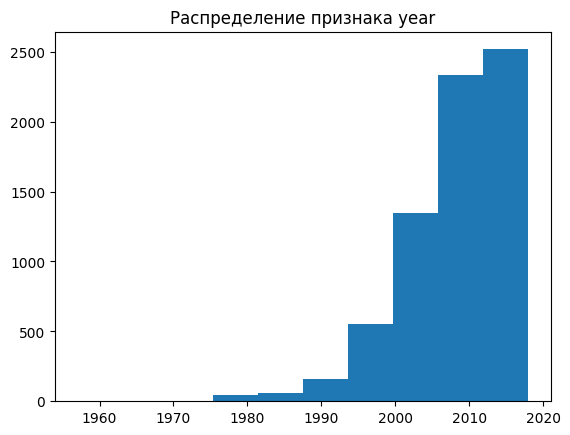

In [111]:
plt.hist(data.year)
plt.title('Распределение признака year');

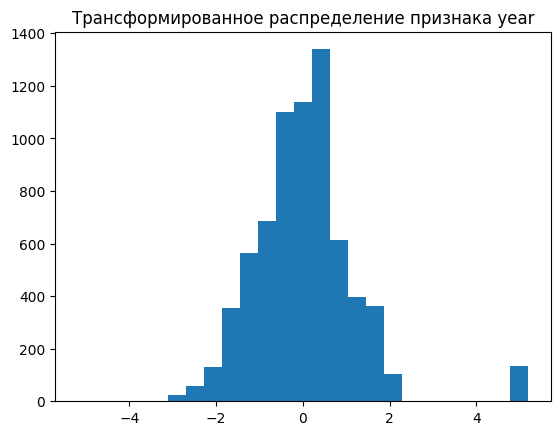

In [112]:
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

#### <center>Log Transform

**Логарифмическое преобразование** — один из самых популярных методов преобразования. В основном оно используется для превращения асимметричного распределения в нормальное/менее асимметричное. В этом преобразовании мы берём логарифм значений признака вместо самих значений.

Почему это работает? Потому что функция логарифма создана для работы с большими числами.

Посмотрим на распределение признака `price`. Оно асимметрично, причём значения варьируются от 0 до ~300000.

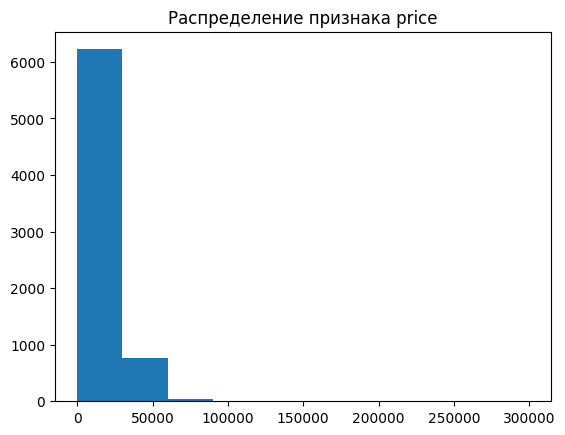

In [113]:
plt.hist(data.price)
plt.title('Распределение признака price');

Идеальный кандидат для логарифмического преобразования — применим его. На этот раз обойдёмся силами *numpy*.

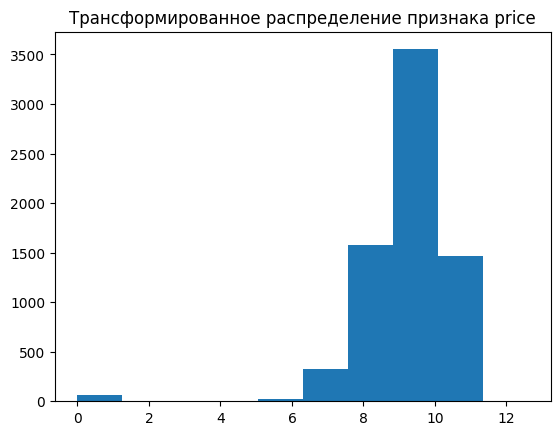

In [114]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

Давайте также сравним значения исходного и трансформированного признака.

In [115]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


Теперь вместо экстремального разброса значений в 1 и 299500 мы получили 0 и 12.6. Таким образом, логарифмическое преобразование сыграло роль в уменьшении влияния слишком низких и слишком высоких значений.

>Стоит учесть, что, если наши данные имеют отрицательные значения или значения в диапазоне от 0 до 1, мы не можем применить логарифмическое преобразование напрямую, поскольку логарифм отрицательных чисел и 0 не определён, то есть мы получим ошибки или значения *NaN* в наших данных. В таких случаях мы можем добавить число к этим значениям, чтобы все они были больше 1.

#### <center>Power Transformer Scaler

Как и другие скейлеры, с которыми вы уже познакомились, *Power Transformer* также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. *Power Transformer* фактически автоматизирует принятие этого решения, вводя параметр, называемый `lambda`. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение $lambda$ и используя один из следующих параметрических методов:

* **Преобразование Бокса-Кокса**, которое работает для положительных значений признака.
* **Преобразование Йео-Джонсона**, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.
В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

In [120]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

c:\Users\ilyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 123.77792357708721, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
c:\Users\ilyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1159: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\ilyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1165: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\ilyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1165: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\ilyad\AppData\Local\P

c:\Users\ilyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6834: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\ilyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6835: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

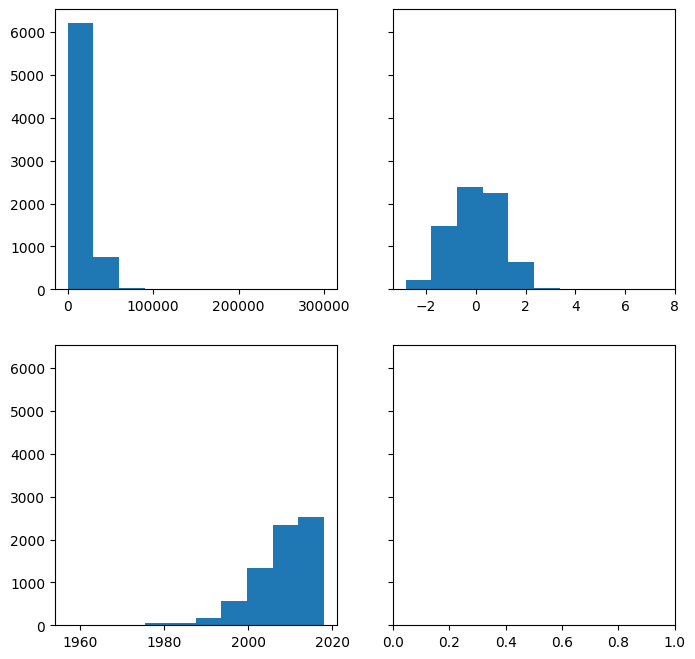

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()

>✍ После того как данные избавлены от пропусков, закодированы и масштабированы, приходит время агрегации полезной информации из них.

По аналогии с датой и временем можно использовать информацию в столбцах, например, широту и долготу.

Давайте найдём конкретный адрес нулевого объекта, используя широту и долготу. Для этого нам понадобится библиотека **geopy**.

In [123]:
import pandas as pd

from geopy.geocoders import Nominatim

In [124]:
data = pd.read_excel('data/data_ford_price.xlsx') 

Создаём объект `Nominatim` и инициализируем *API Nominatim* с помощью параметра `geoapiExercises`.

In [125]:
geolocator = Nominatim(user_agent="geoapiExercises")

Объединим широту и долготу для поиска адреса нулевого объекта:

In [141]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse((Latitude)+','+(Longitude))
print(location)

Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States


Теперь получим информацию из данного списка и преобразуем её в словарь с помощью функции `raw()`:

In [142]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'region': 'East Tennessee',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

*БОНУС

С помощью библиотек **geopandas** и **shapely** можно визуализировать географические данные. Это значит, что мы можем увидеть расположение наших объектов (автомобилей) на карте мира.

Отметим расположение объектов нашей выборки зелёным цветом.

In [147]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

In [149]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

С помощью Plotly мы можем построить интерактивную карту и отследить изменение цены автомобиля в зависимости от его локации:

In [146]:
import plotly.express as px
import pandas as pd
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()

>**Отбор признаков** — это процесс выбора важных признаков, оказывающих наибольшее влияние на предсказание.

Давайте оценим влияние мультиколлинеарности на линейную регрессию:

In [150]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)
y = data['price']
x = data.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 4682.957

MAE: 4856.318


Мы выяснили, что у нас присутствует сильная зависимость между `lat` и `weather`. Удалим `lat`, так как этот признак, в отличие от `weather`, необходимо округлять.

In [151]:
x.drop('lat', axis = 1, inplace = True)

# MAE: 4672.930

>✍ Итак, мы вспомнили о понятии мультиколлинеарности и о его влиянии на отбор признаков. В следующем юните мы разберём автоматические методы отбора признаков, влияющих на качество моделирования.

>Методы отбора признаков предназначены для уменьшения количества входных переменных до тех значений, которые наиболее полезны для предсказательной способности модели.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-9_5.png)

#### <center>RFE

>**Метод рекурсивного исключения признаков (RFE)** предполагает выбор признаков путём рекурсивного рассмотрения всё меньших и меньших наборов фичей.

Сначала *RFE* обучается на изначальной выборке и происходит оценка важности каждого признака. Затем наименее важные фичи удаляются. Эта процедура рекурсивно повторяется на сокращённом наборе до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков в выборке.

Выделим три наиболее значимых признака:

In [152]:
from sklearn.feature_selection import RFE
 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

Также узнаем, как RFE проранжировал все доступные признаки:

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-9_2.png)

#### <center>МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

В качестве фильтров для выбора признаков используются уже знакомые нам статистики, такие как коэффициент корреляции Пирсона, ANOVA и т. д. При этом выбор статистических показателей сильно зависит от типов переменных в данных.

Чем больше известно о типе данных, тем проще выбрать подходящую статистическую меру для метода отбора признаков на основе фильтра. Ниже приведена схема — помощник в выборе метода селекции признаков.

![](./image/asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml6-9_3.png)

Библиотека *sklearn* обеспечивает реализацию большинства полезных статистических показателей, например:

* коэффициента корреляции Пирсона: `f_regression()`;
* дисперсионного анализа ANOVA: `f_classif()`;
* хи-квадрата: `chi2()`;
* взаимной информации: `mutual_info_classif()` и `mutual_info_regression()`.

Кроме того, библиотека *SciPy* обеспечивает реализацию многих других статистических данных, таких как тау Кендалла (kendalltau) и ранговая корреляция Спирмена (spearmanr).

*sklearn* также предоставляет множество различных методов фильтрации после расчёта статистики для каждой входной переменной с целевой.

Два наиболее популярных метода:

* выбор *k* лучших переменных: SelectKBest;
* выбор переменных верхнего процентиля: SelectPercentile.

In [153]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

На этот раз `odometer` оказался в топе.